##Google Drive and importing libs 

mounting for data files

In [1]:
# Type here current folder for notebook for data
# data files and notebook should be in one folder

PROJECT_FOLDER = '/content/drive/MyDrive/ColabNotebooks/!_python4data/datetime'

def connect_gdrive(PROJECT_FOLDER):
    from google.colab import drive
    import os

    drive.mount('/content/drive')
    os.chdir(PROJECT_FOLDER)
    print('Now current folder is: ', os.getcwd())

connect_gdrive(PROJECT_FOLDER)

Mounted at /content/drive
Now current folder is:  /content/drive/MyDrive/ColabNotebooks/!_python4data/datetime


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plot_styles_list = [
    'seaborn',
    'fivethirtyeight',
    'seaborn-pastel',
    'seaborn-whitegrid',
    'ggplot',
    'grayscale'
]

# Rule of Thumb while importing data with datetime info - converting to needed format

```python
df = co.copy()

pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.info()
```

In [2]:
from datetime import date

In [6]:
florida_hurricane_dates = pd.read_pickle(r'florida_hurricane_dates.pkl')

In [9]:
type(florida_hurricane_dates)

list

In [ ]:
florida_hurricane_dates

## In date (from datetime) methods:



*   .day, .year, .weekday(), 
*   



### Timedelta

In [23]:
from datetime import date, timedelta

In [24]:
# simple

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


In [13]:
#

## Date to string formats - .isoformat() and .strftime(). From DATETIME format to STRING

### Dates

In [14]:
start.strftime("%Y")

'2007'

In [21]:
start.strftime("%Y/%m/%d")

'2007/05/09'

In [20]:
start.isoformat()

'2007-05-09'

In [22]:
start.strftime('%B (%Y)')

'May (2007)'

In [26]:
start.strftime('%Y-%j')

'2007-129'

## Time - datetime (datetime.datetime)

In [27]:

from datetime import datetime

#### Creating datetime object

In [29]:
# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)
print(dt)

2017-12-31 15:19:13


### Replacing values - updating datetime objects

In [28]:
# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)
print(dt)
# Replace the year with 1917
dt_old = dt.replace(year=1917)

print(dt_old)

2017-12-31 15:19:13
1917-12-31 15:19:13


In [35]:
dt.isoformat()

'2017-12-31T15:19:13'

## From STRING to DATETIME format - datetime.strptime()

In [33]:
dt_from_str = datetime.strptime("12/30/2017 15:19:13", "%m/%d/%Y %H:%M:%S")
dt_from_str

datetime.datetime(2017, 12, 30, 15, 19, 13)

## From TIMESTAMP do DATETIME

In [34]:
ts = 1514665153.0
datetime.fromtimestamp(ts)

datetime.datetime(2017, 12, 30, 20, 19, 13)

## Timedelta

In [36]:
from datetime import timedelta

In [42]:
delta1 = timedelta(days=1)

In [43]:
delta1

datetime.timedelta(days=1)

In [44]:
delta1.days

1

In [45]:
start

datetime.date(2007, 5, 9)

In [46]:
start + delta1

datetime.date(2007, 5, 10)

### substract one date from another

In [47]:
delta_m = end - start
delta_m.days

218

In [48]:
print(start, end)

2007-05-09 2007-12-13


In [49]:
!ls

capital-onebike.csv  chapter1.pdf  datetime.ipynb  florida_hurricane_dates.pkl


In [50]:
onebike_datetimes = pd.read_csv('capital-onebike.csv')

In [52]:
onebike_datetimes.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [54]:
byke_start = datetime(2017, 12, 20, 13, 43, 36)
byke_end =  datetime(2017, 12, 20, 13, 54, 39)

byke_start

datetime.datetime(2017, 12, 20, 13, 43, 36)

In [56]:
byke_delta = byke_end - byke_start
byke_delta

datetime.timedelta(seconds=663)

In [57]:
byke_delta.seconds

663

In [58]:
byke_delta.total_seconds()

663.0

## Time Zones, UTC

In [59]:
from datetime import datetime, timedelta, timezone

Create datetime with timezone argument.


When creating datetime, previously should calculate exact diff in time between perticular timezone and standard (delta is 0)

In [60]:
# October 1, 2017 at 15:26:26, UTC
tz_dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo = timezone(timedelta(hours=0)))

# Print results
print(tz_dt.isoformat())


2017-10-01T15:26:26+00:00


In [65]:
# datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone(offset=))

TypeError: ignored

In [72]:
trip = byke_start.astimezone(timezone.utc) 
trip

datetime.datetime(2017, 12, 20, 13, 43, 36, tzinfo=datetime.timezone.utc)

In [ ]:
# help(timezone.utc)

## dateutil package for timezones

In [84]:
from dateutil import tz

In [98]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')
ist

tzfile('/usr/share/zoneinfo/Asia/Kolkata')

In [93]:
byke_start

datetime.datetime(2017, 12, 20, 13, 43, 36)

In [99]:
local = byke_end
print(local.isoformat())


# What time was it in the UK?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(notlocal.isoformat())

2017-12-20T13:54:39
2017-12-20T19:24:39+05:30


In [100]:
timedelta(hours=6)

datetime.timedelta(seconds=21600)

When we compare times in local time zones, everything gets converted into clock time. Remember if you want to get absolute time differences, always move to UTC!

When in doubt, always use tz instead of hand-rolling timezones, so it will catch the Daylight Saving rules (and rule changes!) for you.

## Checking problems with timezones

`tz.datetime_ambiguous`

`tz.enfold`

## Pandas: datetime manipulating

### while importing data args for datetime `parse_dates=`

In [116]:
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates=['Start date', 'End date']
                    )
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [117]:
rides.describe()

,Start station number,End station number
count,290.000000,290.000000
mean,31327.831034,31327.800000
std,183.415299,184.559706
min,31014.000000,31014.000000
25%,31225.000000,31226.250000
50%,31264.500000,31263.500000
75%,31505.000000,31505.000000
max,31706.000000,31805.000000


In [118]:
rides.columns

Index(['Start date', 'End date', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member type'],
      dtype='object')

In [125]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Start date            290 non-null    datetime64[ns] 
 1   End date              290 non-null    datetime64[ns] 
 2   Start station number  290 non-null    int64          
 3   Start station         290 non-null    object         
 4   End station number    290 non-null    int64          
 5   End station           290 non-null    object         
 6   Bike number           290 non-null    object         
 7   Member type           290 non-null    object         
 8   duration              290 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 20.5+ KB


In [120]:
rides['duration'] = rides['End date'] - rides['Start date']

In [124]:
rides['duration'] \
    .dt.total_seconds() \
    .head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: duration, dtype: float64

In [127]:
rides['duration'] \
    .dt.seconds

0       181
1      7622
2       343
3      1278
4      1277
       ... 
285     651
286     625
287     279
288     210
289     610
Name: duration, Length: 290, dtype: int64

#### dt.seconds and dt.total_seconds: int and float - that`s the difference

### Resample - grouping datetime by specific intervals and plotting them


.resample() can be called after .groupby(). 

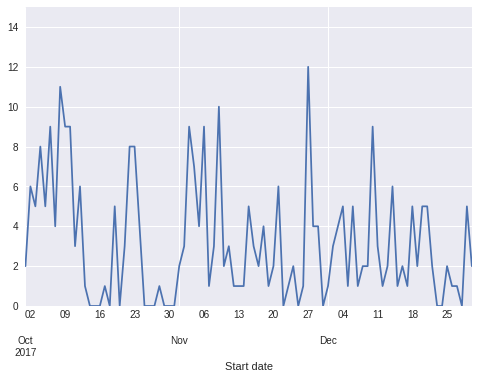

In [128]:
# Resample rides to daily, take the size, plot the results
rides.resample('D', on = 'Start date')\
  .size() \
  .plot(ylim = [0, 15])

# Show the results
plt.show()

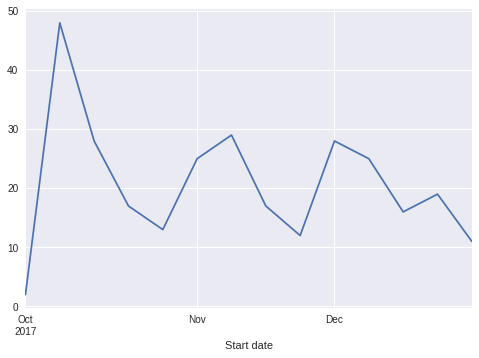

In [131]:
# Resample rides to monthly, take the size, plot the results
rides.resample('W', on = 'Start date')\
  .size() \
  .plot() # ylim = [0, 15]

# Show the results
plt.show()

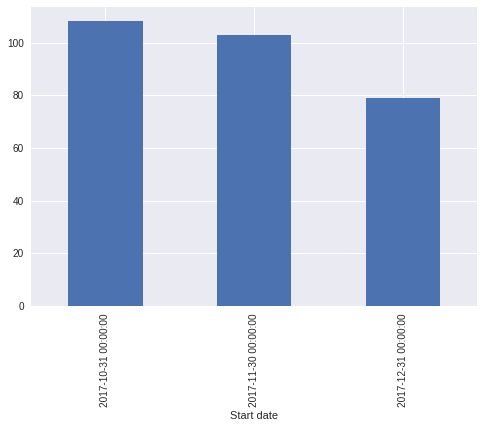

In [134]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size() \
  .plot(kind='bar') # ylim = [0, 15]

# Show the results
plt.show()

### Grouping and agg metrics per grouped datetimes intervals

Note that by default, .resample() labels Monthly resampling with the last day in the month and not the first. It certainly looks like the fraction of Casual riders went down as the number of rides dropped. With a little more digging, you could figure out if keeping Member rides only would be enough to stabilize the usage numbers throughout the fall.

In [135]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Grouped table (.groupby()) could be used with any column in dataframe afterwards. 

In [137]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on = 'Start date')

# Print the median duration for each group
print(grouped['duration'].median())

Member type  Start date
Casual       2017-10-31          0 days 00:27:16
             2017-11-30   0 days 00:19:19.500000
             2017-12-31          0 days 00:14:10
Member       2017-10-31          0 days 00:11:11
             2017-11-30          0 days 00:10:55
             2017-12-31   0 days 00:06:27.500000
Name: duration, dtype: timedelta64[ns]


In [139]:
grouped['Start station number'].max()

Member type  Start date
Casual       2017-10-31    31706
             2017-11-30    31627
             2017-12-31    31637
Member       2017-10-31    31703
             2017-11-30    31701
             2017-12-31    31646
Name: Start station number, dtype: int64

### Transforming time_zones and ambiguous marking: `.dt.tz_convert()` `.dt.tz_localize(ambiguous='NaT')`

dt.tz_convert() converts to a new timezone, whereas dt.tz_localize() sets a timezone in the first place. 

In [140]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'] \
    .dt.tz_localize('America/New_York', ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [ ]:
# ERROR 
rides['Start date'] = rides['Start date'] \
    .dt.tz_localize('America/New_York', ambiguous='NaT')

In [142]:
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


#### getting weekday number

In [146]:
rides['Start date'].dt.weekday

0      6.0
1      6.0
2      0.0
3      0.0
4      0.0
      ... 
285    4.0
286    4.0
287    5.0
288    5.0
289    5.0
Name: Start date, Length: 290, dtype: float64

#### getting weekday name

In [145]:
rides['Start date'].dt.day_name()


0        Sunday
1        Sunday
2        Monday
3        Monday
4        Monday
         ...   
285      Friday
286      Friday
287    Saturday
288    Saturday
289    Saturday
Name: Start date, Length: 290, dtype: object

### .dt. in pandas

There are .dt attributes for all of the common things you might want to pull out of a datetime, such as the day, month, year, hour, and so on, and also some additional convenience ones, such as quarter and week of the year out of 52.

In [148]:
rides['Start date'] - rides['End date'].shift(1)

TypeError: ignored

In [150]:
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

TypeError: ignored

In [151]:
rides.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,duration
0,2017-10-01 20:23:25+01:00,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01
1,2017-10-01 20:42:57+01:00,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02
2,2017-10-02 11:37:10+01:00,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43
3,2017-10-02 13:56:45+01:00,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18
4,2017-10-02 23:23:48+01:00,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17


In [ ]:
# # Shift the index of the end date up one; now subract it from the start date
# rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# # Move from a timedelta to a number of seconds, which is easier to work with
# rides['Time since'] = rides['Time since'].dt.total_seconds()

# # Resample to the month
# monthly = rides.resample('M', on = 'Start date')

# # Print the average hours between rides each month
# print(monthly['Time since'].mean()/(60*60))

New course on datacamp: https://app.datacamp.com/learn/courses/manipulating-time-series-data-in-python 

## Pandas advanced

## Period() object

### .asfreq() - change sequence from days to months and reversed

### pd.date_range - Create range of days

In [2]:
# Create the range of dates here
seven_days = pd.date_range(
    start='2007-1-1', 
    periods=7,
    freq='D'
)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())



0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


## Pandas example

In [6]:
google = pd.read_csv('./stock_data/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [7]:
google.columns

Index(['Date', 'Close'], dtype='object')

In [8]:
google.index

RangeIndex(start=0, stop=1094, step=1)

In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [11]:
google.describe()

,Close
count,756.000000
mean,635.758280
std,94.405359
min,492.550000
25%,547.872500
50%,601.045000
75%,729.320000
max,813.110000


In [15]:
data = pd.read_csv('./air_quality_data/nyc.csv')
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [16]:
# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


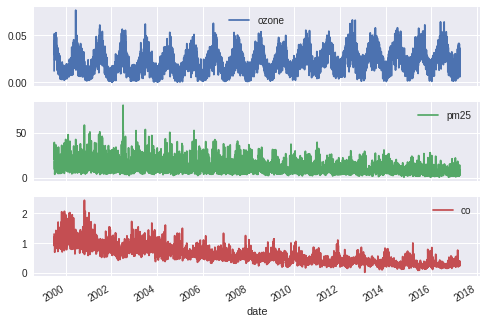

In [19]:
data.plot(subplots=True)
plt.show()

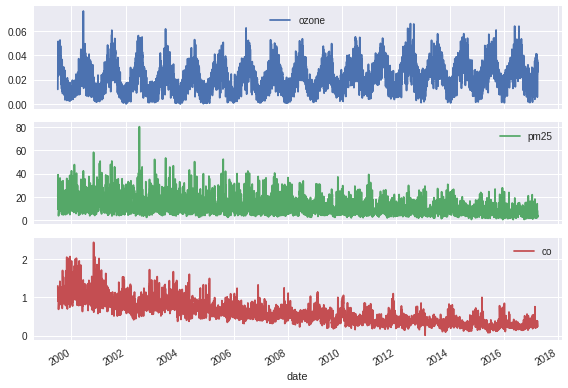

In [20]:
data.plot(subplots=True)
plt.tight_layout()
plt.show()

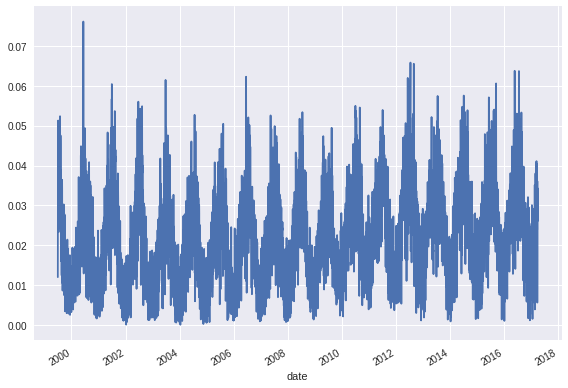

In [23]:
data.ozone.plot()
plt.tight_layout()
plt.show()

In [26]:
yahoo = pd.read_csv('./stock_data/yahoo.csv')
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    782 non-null    object 
 1   price   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [28]:
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    782 non-null    datetime64[ns]
 1   price   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


## Set index by datetime  allows to select rows in different ways `df.set_index(FIELD_NAME, inplace=True)`

like `df.loc['2014']`

In [34]:
3yahoo.set_index('date', inplace=True)

In [35]:
yahoo.loc['2013', ['price']][:3]

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86


In [36]:
yahoo.info()
# yahoo.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


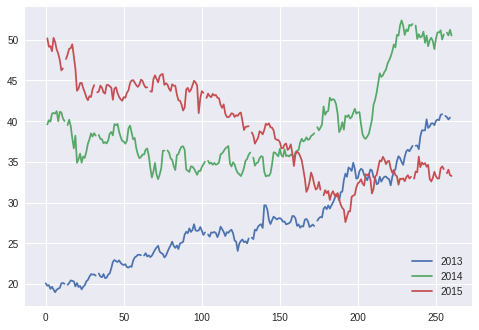

In [37]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.show()


In [38]:
prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


In [42]:
_2013  = yahoo.loc['2013', ['price']]

In [43]:
_2013.shape

(260, 1)

In [44]:
_2014  = yahoo.loc['2014', ['price']]
_2014.shape

(261, 1)

In [45]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [3]:
!ls

air_quality_data     datetime.ipynb		  pdf_basics
capital-onebike.csv  florida_hurricane_dates.pkl  stock_data


In [3]:
co = pd.read_csv('./air_quality_data/co_cities.csv')
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [3]:
co = pd.read_csv('./air_quality_data/co_cities.csv')

co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB


# Rule of Thumb while importing data with datetime info - converting to needed format

```python
df = co.copy()

pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.info()
```

In [ ]:
co = pd.read_csv('./air_quality_data/co_cities.csv')

co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)
co.info()

## Plotting data w diff freq of time

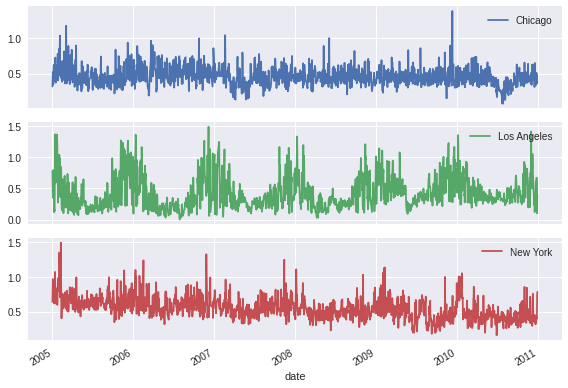

In [15]:
#co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()


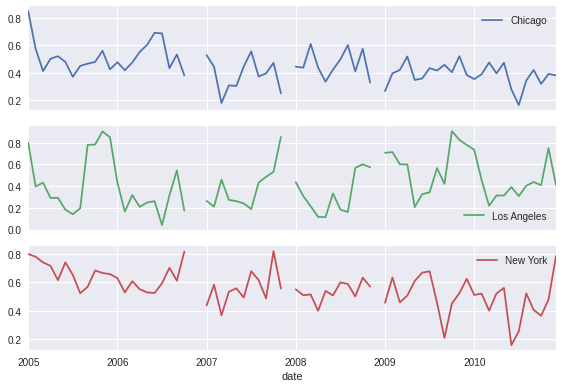

In [16]:
co_m = co.asfreq('M')

# Plot the data
co_m.plot(subplots=True)
plt.tight_layout()
plt.show()

## Shifting values inside column of data

Shift here in NEXT value in data fram (if shift is positive value)

In [5]:
co['Chicago_shifted'] = co['Chicago'].shift(1)
co.head()

,Chicago,Los Angeles,New York,Chicago_shifted
date,,,,
2005-01-01,0.317763,0.777657,0.639830,NaN
2005-01-03,0.520833,0.349547,0.969572,0.317763
2005-01-04,0.477083,0.626630,0.905208,0.520833
2005-01-05,0.348822,0.613814,0.769176,0.477083
2005-01-06,0.572917,0.792596,0.815761,0.348822


In [18]:
co['Chicago_shift_minus_1'] = co['Chicago'].shift(-1)
co.head()

,Chicago,Los Angeles,New York,Chicago_shifted,Chicago_shift_minus_1
date,,,,,
2005-01-01,0.317763,0.777657,0.639830,NaN,0.520833
2005-01-03,0.520833,0.349547,0.969572,0.317763,0.477083
2005-01-04,0.477083,0.626630,0.905208,0.520833,0.348822
2005-01-05,0.348822,0.613814,0.769176,0.477083,0.572917
2005-01-06,0.572917,0.792596,0.815761,0.348822,0.625000


### Calc percentage of change view changes ('Moving average')

In [6]:
co['Chicago_change'] = co['Chicago'].div(co['Chicago_shifted'])
co.head()

,Chicago,Los Angeles,New York,Chicago_shifted,Chicago_change
date,,,,,
2005-01-01,0.317763,0.777657,0.639830,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572,0.317763,1.639063
2005-01-04,0.477083,0.626630,0.905208,0.520833,0.916000
2005-01-05,0.348822,0.613814,0.769176,0.477083,0.731156
2005-01-06,0.572917,0.792596,0.815761,0.348822,1.642430


In [8]:
# percent of changing (0 .. 1)

co['Chicago_change'].sub(1)

date
2005-01-01         NaN
2005-01-03    0.639063
2005-01-04   -0.084000
2005-01-05   -0.268844
2005-01-06    0.642430
                ...   
2010-12-27    0.376407
2010-12-28   -0.061225
2010-12-29   -0.039130
2010-12-30   -0.207734
2010-12-31    0.045172
Name: Chicago_change, Length: 1898, dtype: float64

In [9]:
# like percent (0 .. 100)

co['Chicago_change'].sub(1).mul(100)

date
2005-01-01          NaN
2005-01-03    63.906276
2005-01-04    -8.399997
2005-01-05   -26.884392
2005-01-06    64.242989
                ...    
2010-12-27    37.640663
2010-12-28    -6.122543
2010-12-29    -3.913045
2010-12-30   -20.773365
2010-12-31     4.517199
Name: Chicago_change, Length: 1898, dtype: float64

#### Percent change method for df with time index

In [11]:
co['Chicago'].pct_change().mul(100)

date
2005-01-01          NaN
2005-01-03    63.906276
2005-01-04    -8.399997
2005-01-05   -26.884392
2005-01-06    64.242989
                ...    
2010-12-27    37.640663
2010-12-28    -6.122543
2010-12-29    -3.913045
2010-12-30   -20.773365
2010-12-31     4.517199
Name: Chicago, Length: 1898, dtype: float64

Setting window for moving average

In [12]:
co['Chicago'].pct_change(periods=3).mul(100)

date
2005-01-01          NaN
2005-01-03          NaN
2005-01-04          NaN
2005-01-05     9.774423
2005-01-06     9.999933
                ...    
2010-12-27    40.000027
2010-12-28    41.975259
2010-12-29    24.157370
2010-12-30   -28.534414
2010-12-31   -20.434755
Name: Chicago, Length: 1898, dtype: float64

In [14]:
! ls ./stock_data

5_stocks.csv	       dow_jones.csv   market_cap_series.csv  tickers.csv
apple_google.csv       fb.csv	       msft_aapl.csv	      unrate_2000.csv
asset_classes.csv      gdp_growth.csv  nyse.csv		      unrate.csv
components.csv	       goog_fb.csv     random_walk.csv	      yahoo.csv
debt_unemployment.csv  google.csv      sp500.csv
djia2.csv	       index.csv       stock_data.csv
djia.csv	       listings.xlsx   stocks_4.csv


### Business daily freq = 'B'

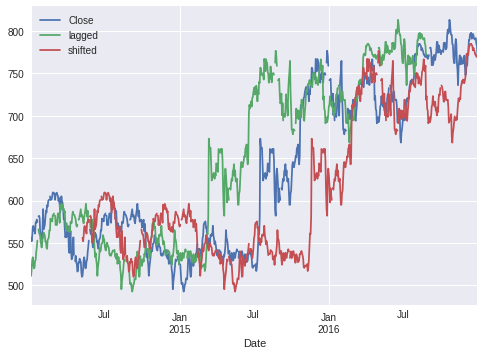

In [23]:
google = pd.read_csv('./stock_data/google.csv', parse_dates=True, index_col='Date')


google = google.asfreq('B')
# google = google.asfreq('D')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

google.plot()
plt.show()

In [26]:
yahoo = pd.read_csv('./stock_data/yahoo.csv')
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [27]:
yahoo = pd.read_csv('./stock_data/yahoo.csv' , parse_dates=True, index_col='date')


yahoo = yahoo.asfreq('B')



# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


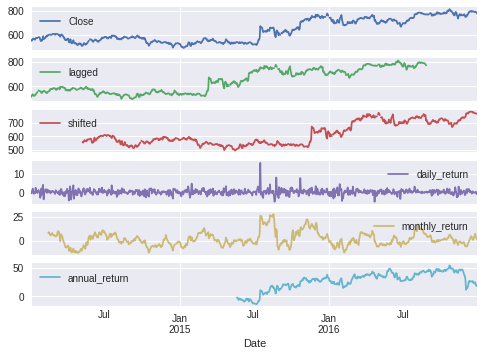

In [28]:


google['daily_return'] = google['Close'].pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360).mul(100)

# Plot the result   
google.plot(subplots=True)
plt.show()

### Key methods:


* .diff()  
* .sub()
*  



## End of notebook